In [9]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
print(tf.__version__) ## 2.12.0

2023-12-18 14:43:59.778812: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 14:43:59.780116: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 14:43:59.805716: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 14:43:59.806348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 14:44:00.316138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

2.12.0


In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import GRU, LSTM
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/berkkucukk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/berkkucukk/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # İngilizce stop words'leri kullanabilirsiniz, dilinize göre değiştirebilirsiniz
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [10]:
dataset = pd.read_csv('news.csv')

In [11]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
category_size = len(dataset["label"].unique())
category_size

2

In [13]:
label_encoder = LabelEncoder()
dataset['encoded_category'] = label_encoder.fit_transform(dataset['label'])

In [14]:
dataset['encoded_category']

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: encoded_category, Length: 6335, dtype: int64

In [15]:
target = dataset['encoded_category'].values
data = dataset['text'].values

In [16]:
print("Class Lenght: ", len(target))

Class Lenght:  6335


In [17]:
print("Data Lenght: ", len(data))

Data Lenght:  6335


In [18]:
cutoff = int(len(data) * 0.80) #listeyi böldük
x_train, x_test = data[:cutoff], data[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [19]:
print(x_train[299])
len(x_train[299])

Congress faces a June 1 deadline for the law's expiration, and Paul's speech underscored the deep divisions over the National Security Agency's (NSA's) bulk collection of Americans' phone records, which was revealed by former contractor Edward Snowden.

"There comes a time in the history of nations when fear and complacency allow power to accumulate and liberty and privacy to suffer," the Kentucky senator said at 1:18 p.m. EDT when he took to the Senate floor. "That time is now, and I will not let the Patriot Act, the most unpatriotic of acts, go unchallenged."

He finished at 11:49 p.m., having not sat for more than 10 hours.

The House overwhelmingly passed a bill to end the bulk collection and Senate Majority Leader Mitch McConnell, R-Kentucky, has said the Senate will act on the issue before beginning a Memorial Day recess scheduled for week's end.

But McConnell, along with presidential hopefuls Sens. Marco Rubio, R-Florida, and Lindsey Graham, R-South Carolina, favors extending t

4344

In [20]:
y_train[299]

1

In [21]:
num_words = 50000 # kelime haznemizdeki max kelime sayısı
tokenizer = Tokenizer(num_words=num_words)

In [22]:
tokenizer.fit_on_texts(data)

In [23]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 'that': 7,
 'is': 8,
 'for': 9,
 'on': 10,
 'as': 11,
 'it': 12,
 'with': 13,
 'he': 14,
 'was': 15,
 'are': 16,
 'be': 17,
 'this': 18,
 'by': 19,
 'have': 20,
 '”': 21,
 'not': 22,
 'his': 23,
 'has': 24,
 'at': 25,
 'said': 26,
 'but': 27,
 'from': 28,
 'trump': 29,
 'they': 30,
 'an': 31,
 'who': 32,
 'i': 33,
 'will': 34,
 'we': 35,
 'clinton': 36,
 'or': 37,
 'you': 38,
 'about': 39,
 'their': 40,
 'more': 41,
 'would': 42,
 'all': 43,
 'one': 44,
 'been': 45,
 'her': 46,
 'people': 47,
 'if': 48,
 'what': 49,
 'she': 50,
 'were': 51,
 'had': 52,
 'which': 53,
 'out': 54,
 'so': 55,
 'when': 56,
 'new': 57,
 'up': 58,
 'there': 59,
 'state': 60,
 'no': 61,
 '—': 62,
 'than': 63,
 'can': 64,
 'president': 65,
 'also': 66,
 'our': 67,
 'us': 68,
 'other': 69,
 'campaign': 70,
 'after': 71,
 'do': 72,
 'just': 73,
 'over': 74,
 'some': 75,
 'like': 76,
 'its': 77,
 'time': 78,
 'them': 79,
 'into': 80,
 'obama': 81,
 'hil

In [24]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [35]:
!pip3 install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 856.1 kB/s eta 0:00:00a 0:00:01


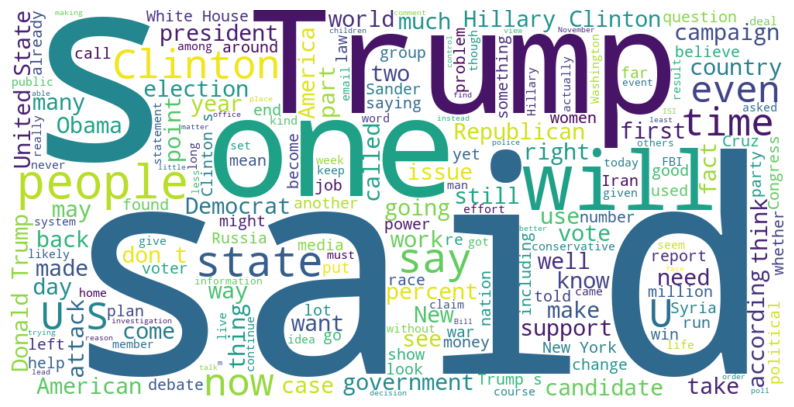

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

data_strings = np.vectorize(str)(data)

# Metni birleştirme
text_data = " ".join(data_strings)

# Kelime bulutu nesnesi oluşturma
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_data)

# Grafiği gösterme
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri kapatma
plt.show()


In [21]:
x_train[10]

'CEDAR RAPIDS, Iowa — “I had one of the most wonderful rallies of my entire career right here in 1992,” Bill Clinton said by way of opening to the crowd of more than 1,100 on Saturday night.\n\nTwo days before the Iowa caucuses, Cedar Rapids tried to deliver that same old feeling to his wife, Hillary Clinton.\n\nIn the crowd,\xa0one woman held a sign that said “227 years of men. It’s HER turn!" Some carried signs and books. Others had traveled from as far as Missouri. They had waited hours, even after the fire marshal told them there was no more room inside the high school gymnasium.\n\nThe restive crowd chanted slogans and buzzed with anticipation until finally Bill, Hillary and Chelsea Clinton all appeared on stage hand-in-hand, an hour behind schedule. As they roared, Hillary Clinton beamed.\n\nIt has been a long slog in Iowa for the Clinton campaign, which has struggled mightily to shake the label that its supporters can’t muster the enthusiasm of its rival’s backers. As the caucus

In [22]:
x_train_tokens[10]

[14404,
 10694,
 424,
 62,
 290,
 52,
 44,
 3,
 1,
 92,
 4627,
 2097,
 3,
 128,
 677,
 1690,
 135,
 167,
 6,
 2974,
 21,
 209,
 36,
 26,
 19,
 123,
 3,
 1839,
 2,
 1,
 1032,
 3,
 41,
 63,
 188,
 771,
 10,
 809,
 328,
 93,
 265,
 117,
 1,
 424,
 1615,
 14404,
 10694,
 775,
 2,
 2325,
 7,
 163,
 313,
 2075,
 2,
 23,
 951,
 82,
 36,
 6,
 1,
 1032,
 19663,
 583,
 584,
 5,
 783,
 7,
 26,
 108,
 3,
 480,
 122,
 46,
 640,
 75,
 1766,
 1576,
 4,
 1997,
 368,
 52,
 3834,
 28,
 11,
 216,
 11,
 2517,
 30,
 52,
 5539,
 697,
 85,
 71,
 1,
 923,
 12373,
 140,
 79,
 59,
 15,
 61,
 41,
 1038,
 987,
 1,
 299,
 540,
 24267,
 1,
 18621,
 1032,
 8158,
 7599,
 4,
 29579,
 13,
 10931,
 375,
 955,
 209,
 82,
 4,
 4868,
 36,
 43,
 999,
 10,
 751,
 678,
 6,
 678,
 31,
 1225,
 389,
 3731,
 11,
 30,
 13501,
 82,
 36,
 24268,
 12,
 24,
 45,
 5,
 182,
 10932,
 6,
 424,
 9,
 1,
 36,
 70,
 53,
 24,
 3544,
 19664,
 2,
 4516,
 1,
 5753,
 7,
 77,
 304,
 623,
 12059,
 1,
 3732,
 3,
 77,
 22438,
 3265,
 11,
 1,
 1615,
 7

In [23]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [24]:
np.mean(num_tokens)

780.4236779794791

In [25]:
np.max(num_tokens)

20607

In [26]:
np.argmax(num_tokens)

4733

In [27]:
x_train[21]

'November 13, 2016 By 21wire Leave a Comment \nEpisode #160 of SUNDAY WIRE SHOW resumes this November 13, 2016 as host Patrick Henningsen brings a 3 HOURS special broadcast of LIVE power-packed talk radio on ACR… \nLISTEN LIVE ON THIS PAGE AT THE FOLLOWING SCHEDULED SHOW TIMES: \nSUNDAYS – 5pm-8pm UK Time | 12pm-3pm ET (US) | 9am-12pm PT (US) \nThis week’s edition of THE SUNDAY WIRE is on the road broadcasting LIVE from the Valley of the Sun. This week host Patrick Henningsen covers this week’s top stories in the US and internationally. In the first hour we’ll conduct a post-mortem on the incredible US Election which has produced President Elect Donald J Trump , and the aftermath – a nation divided punctuated by numerous street protests in part fuelled by Soros and the Democratic Party Machine . Later, we’re joined by our roving everyman , ACR Boiler Room contributor, Randy J , for an on the ground take on Election events from the West Coast, and beyond… \nSUPPORT 21WIRE – SUBSCRIBE & 

In [28]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

2488

In [29]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9698500394632992

In [30]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [31]:
# Metinleri stop words'lerden temizle
x_train_cleaned = [remove_stopwords(text) for text in x_train]
x_test_cleaned = [remove_stopwords(text) for text in x_test]

In [32]:
tokenizer.fit_on_texts(x_train_cleaned)
x_train_tokens = tokenizer.texts_to_sequences(x_train_cleaned)
x_test_tokens = tokenizer.texts_to_sequences(x_test_cleaned)
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [33]:
x_train_pad.shape

(5068, 2488)

In [34]:
x_test_pad.shape

(1267, 2488)

In [35]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [36]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [37]:
x_train[10]

'CEDAR RAPIDS, Iowa — “I had one of the most wonderful rallies of my entire career right here in 1992,” Bill Clinton said by way of opening to the crowd of more than 1,100 on Saturday night.\n\nTwo days before the Iowa caucuses, Cedar Rapids tried to deliver that same old feeling to his wife, Hillary Clinton.\n\nIn the crowd,\xa0one woman held a sign that said “227 years of men. It’s HER turn!" Some carried signs and books. Others had traveled from as far as Missouri. They had waited hours, even after the fire marshal told them there was no more room inside the high school gymnasium.\n\nThe restive crowd chanted slogans and buzzed with anticipation until finally Bill, Hillary and Chelsea Clinton all appeared on stage hand-in-hand, an hour behind schedule. As they roared, Hillary Clinton beamed.\n\nIt has been a long slog in Iowa for the Clinton campaign, which has struggled mightily to shake the label that its supporters can’t muster the enthusiasm of its rival’s backers. As the caucus

In [38]:
tokens_to_string(x_train_tokens[10])

"cedar rapids iowa — “ one wonderful rallies entire career right 1992 ” bill clinton said way opening crowd 1 100 saturday night two days iowa caucuses cedar rapids tried deliver old feeling wife hillary clinton crowd one woman held sign said “ 227 years men ’ turn '' carried signs books others traveled far missouri waited hours even fire marshal told room inside high school gymnasium restive crowd chanted slogans buzzed anticipation finally bill hillary chelsea clinton appeared stage hand in hand hour behind schedule roared hillary clinton beamed long slog iowa clinton campaign struggled mightily shake label supporters ’ muster enthusiasm rival ’ backers caucuses near help former president energy level events notably dialing 's charismatic speaker '' said cigi ross 31 general 'd say 's bigger draw people '' monday night put campaign 's months work test campaign ’ organization bring supporters candidate energize voters clinton seemed draw higher than usual energy stood center delivered

In [39]:
x_train_pad[0]

array([  0,   0,   0, ...,  56, 402, 784], dtype=int32)

In [40]:
tf.keras.backend.clear_session()

NameError: name 'tf' is not defined

In [41]:
model = Sequential()

2023-12-18 14:57:22.987325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 14:57:23.010555: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [42]:
embedding_size = 200

In [43]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [44]:
print(category_size)

2


In [45]:
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [46]:
optimizer = Adam(learning_rate=1e-3)

In [47]:
from keras.losses import binary_crossentropy
lss = binary_crossentropy

In [48]:
model.compile(optimizer= 'adam' , loss= lss, metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 2488, 200)         10000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 2484, 32)          32032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1242, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1238, 64)          10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 619, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 615, 128)          41088     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0

In [61]:
model_2 = Sequential()

In [62]:
model_2.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [63]:
model_2.add(GRU(units=32, return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(GRU(units=16, return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(GRU(units=8))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))


In [64]:
model_2.compile(optimizer= 'adam' , loss= lss, metrics=['accuracy'])

In [65]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 2488, 200)         10000000  
_________________________________________________________________
gru_3 (GRU)                  (None, 2488, 32)          22368     
_________________________________________________________________
dropout_5 (Dropout)          (None, 2488, 32)          0         
_________________________________________________________________
gru_4 (GRU)                  (None, 2488, 16)          2352      
_________________________________________________________________
dropout_6 (Dropout)          (None, 2488, 16)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, 8)                 600       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                

In [72]:
model_3 = Sequential()

In [73]:
model_3.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [74]:
model_3.add(LSTM(units=32, return_sequences=True))
model_3.add(Dropout(0.2))
model_3.add(LSTM(units=16, return_sequences=True))
model_3.add(Dropout(0.2))
model_3.add(LSTM(units=8))
model_3.add(Dropout(0.2))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))


In [75]:
model_3.compile(optimizer= 'adam' , loss= lss, metrics=['accuracy'])

In [76]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 2488, 200)         10000000  
_________________________________________________________________
lstm (LSTM)                  (None, 2488, 32)          29824     
_________________________________________________________________
dropout_8 (Dropout)          (None, 2488, 32)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2488, 16)          3136      
_________________________________________________________________
dropout_9 (Dropout)          (None, 2488, 16)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                

In [54]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


In [55]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [56]:
model1_hist = model.fit(x_train_pad, y_train, epochs=25, validation_split=0.2, batch_size=32,callbacks=[early_stopping])

Epoch 1/25
127/127 [==============================] - 13s 98ms/step - loss: 0.5257 - accuracy: 0.7018 - val_loss: 0.1980 - val_accuracy: 0.9162
Epoch 2/25
127/127 [==============================] - 12s 95ms/step - loss: 0.1381 - accuracy: 0.9480 - val_loss: 0.1530 - val_accuracy: 0.9438
Epoch 3/25
127/127 [==============================] - 13s 100ms/step - loss: 0.0211 - accuracy: 0.9928 - val_loss: 0.2382 - val_accuracy: 0.9339
Epoch 4/25
127/127 [==============================] - 14s 108ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.2943 - val_accuracy: 0.9359
Epoch 5/25
127/127 [==============================] - 14s 108ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.3118 - val_accuracy: 0.9290


In [66]:
model2_hist = model_2.fit(x_train_pad, y_train, epochs=25, validation_split=0.2, batch_size=32,callbacks=[early_stopping])

Epoch 1/25
127/127 [==============================] - 223s 2s/step - loss: 0.5331 - accuracy: 0.7185 - val_loss: 0.3583 - val_accuracy: 0.8432
Epoch 2/25
127/127 [==============================] - 216s 2s/step - loss: 0.1636 - accuracy: 0.9480 - val_loss: 0.3173 - val_accuracy: 0.8738
Epoch 3/25
127/127 [==============================] - 215s 2s/step - loss: 0.0288 - accuracy: 0.9928 - val_loss: 0.4677 - val_accuracy: 0.8570
Epoch 4/25
127/127 [==============================] - 216s 2s/step - loss: 0.0097 - accuracy: 0.9983 - val_loss: 0.5202 - val_accuracy: 0.8817
Epoch 5/25
127/127 [==============================] - 218s 2s/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.5672 - val_accuracy: 0.8797


In [77]:
model3_hist = model_3.fit(x_train_pad, y_train, epochs=25, validation_split=0.2, batch_size=32,callbacks=[early_stopping])

Epoch 1/25
127/127 [==============================] - 236s 2s/step - loss: 0.5003 - accuracy: 0.7711 - val_loss: 0.3205 - val_accuracy: 0.8787
Epoch 2/25
127/127 [==============================] - 235s 2s/step - loss: 0.1429 - accuracy: 0.9595 - val_loss: 0.3691 - val_accuracy: 0.8748
Epoch 3/25
127/127 [==============================] - 236s 2s/step - loss: 0.0545 - accuracy: 0.9879 - val_loss: 0.4226 - val_accuracy: 0.8748
Epoch 4/25
127/127 [==============================] - 236s 2s/step - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.5199 - val_accuracy: 0.8738


In [67]:
import matplotlib.pyplot as plt

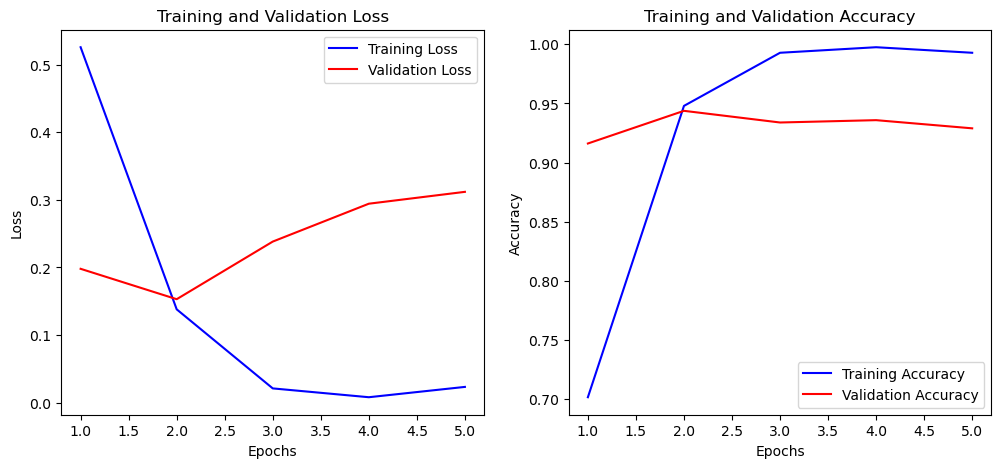

In [78]:
train_loss = model1_hist.history['loss']
val_loss = model1_hist.history['val_loss']
train_accuracy = model1_hist.history['accuracy']
val_accuracy = model1_hist.history['val_accuracy']

# Grafiği oluşturma
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


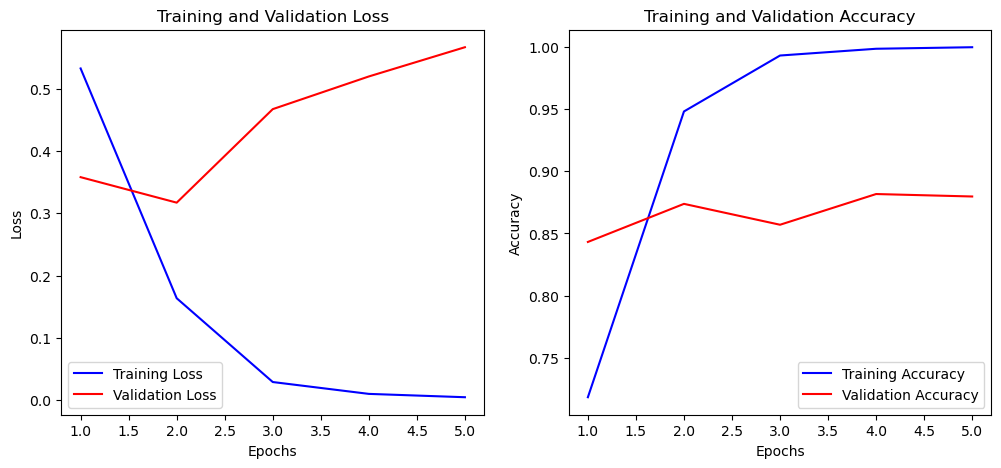

In [79]:
train_loss = model2_hist.history['loss']
val_loss = model2_hist.history['val_loss']
train_accuracy = model2_hist.history['accuracy']
val_accuracy = model2_hist.history['val_accuracy']

# Grafiği oluşturma
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


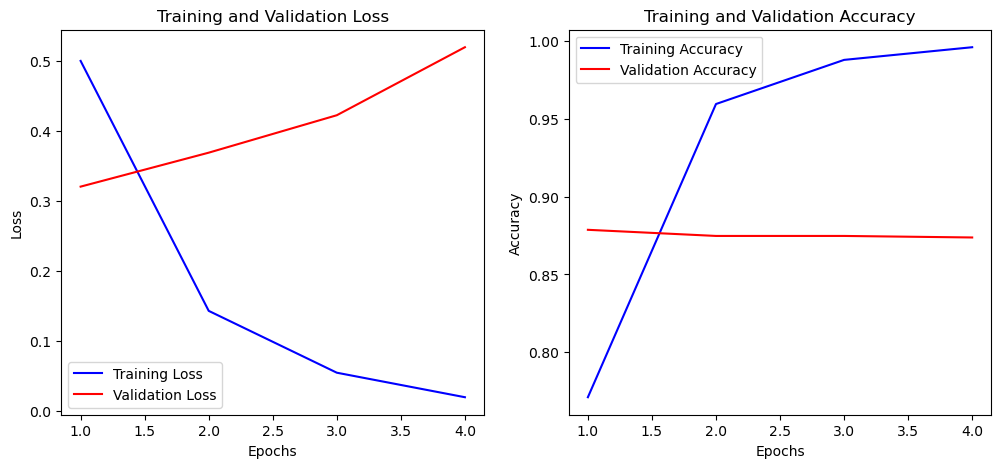

In [80]:
train_loss = model3_hist.history['loss']
val_loss = model3_hist.history['val_loss']
train_accuracy = model3_hist.history['accuracy']
val_accuracy = model3_hist.history['val_accuracy']

# Grafiği oluşturma
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
